In [2]:
#pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 12.7 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 24.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 10.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.8 MB/s eta 0:00:00a 0:00:01

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/root/projects/thesis/asc_desc_working.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  radiation_avg = radiation_data.groupby(pd.cut(radiation_data['Height [m]'], height_intervals)).mean()
/root/projects/thesis/asc_desc_working.py:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_avg = humidity_data.groupby(pd.cut(humidity_data['Height [m]'], height_intervals)).mean()
/root/projects/thesis/asc_desc_working.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to 

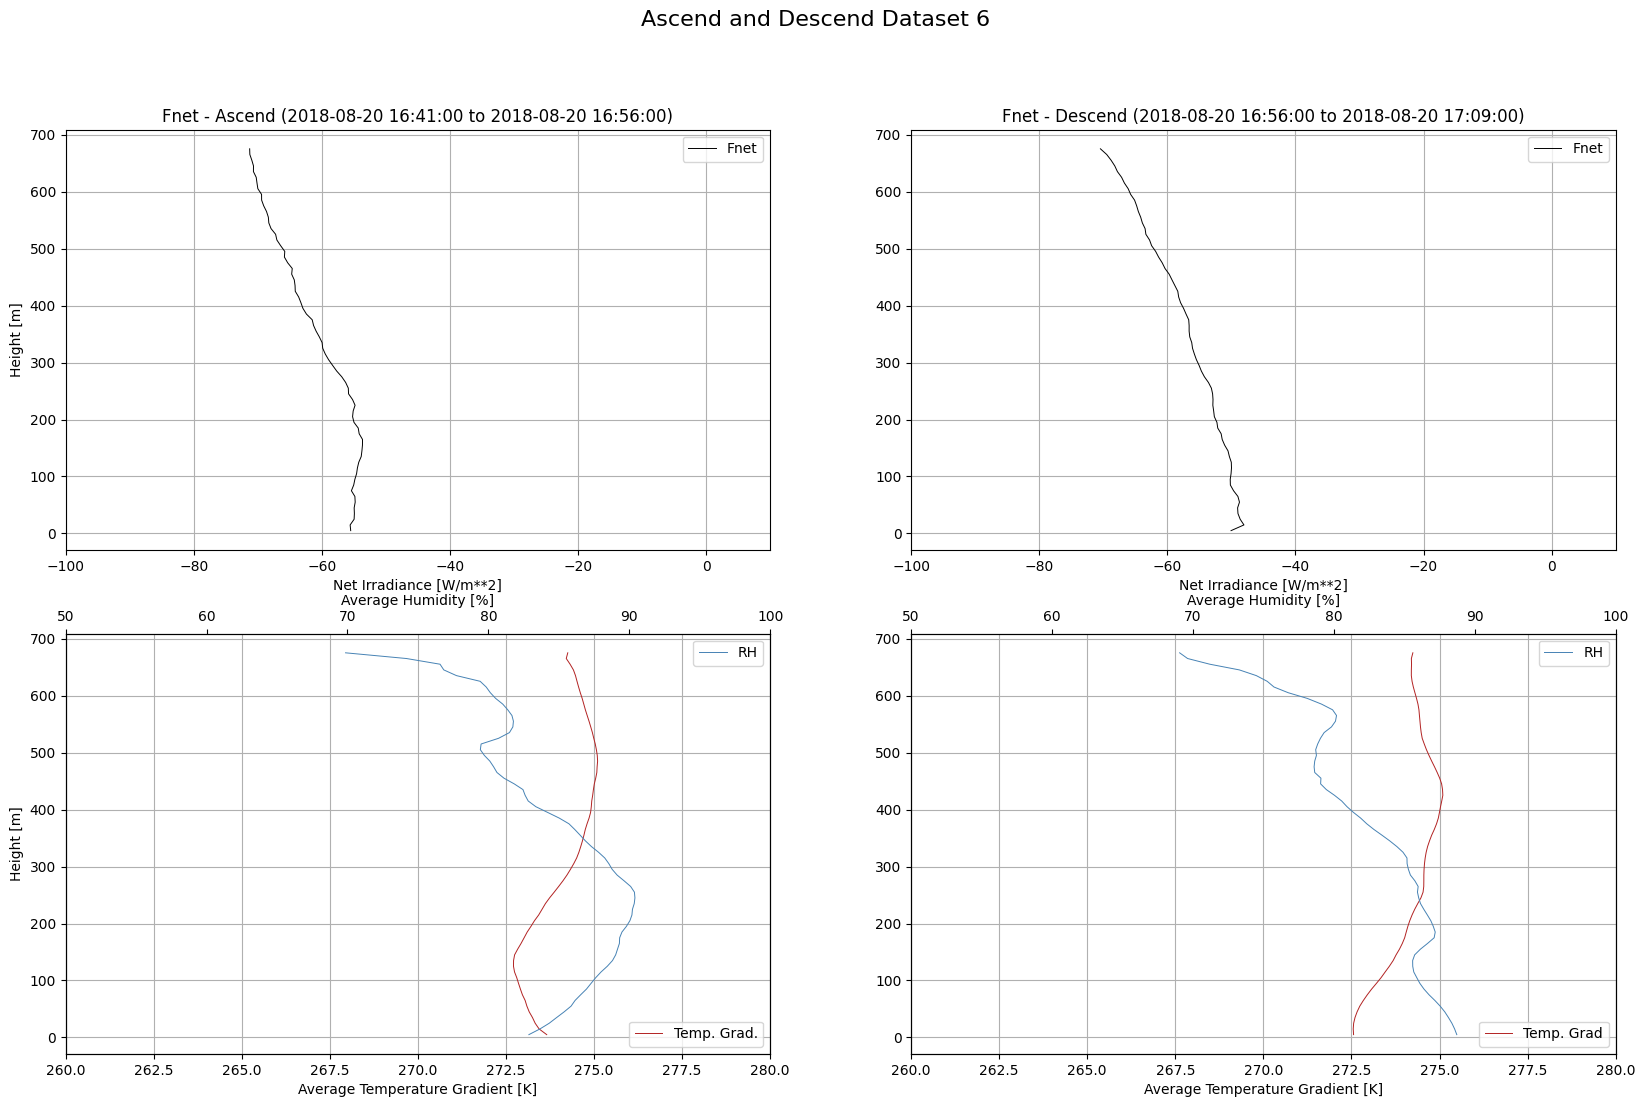

In [14]:
from asc_desc_working import process_data, calculate_and_plot

file_path_radiation_asc= 'data/4radiation_corr_ascend.csv'
file_path_radiation_desc = 'data/4radiation_corr_descend.csv'

calculate_and_plot(file_path_radiation_asc, file_path_radiation_desc)

In [16]:
data = pd.read_csv(file_path_radiation_asc)
data_df = pd.DataFrame(data)

In [19]:
data_df.head(5)

,Date/Time,Latitude,Longitude,PPPP [hPa],TTT grad [K],RH [%],Height [m],Pitch [deg],Roll [deg],Yaw [deg],SWD [W/m**2] (raw),SWU [W/m**2] (raw),LWD [W/m**2] (raw),LWU [W/m**2] (raw),SWD [W/m**2] (corrected),SWU [W/m**2] (corrected),LWD [W/m**2] (corrected),LWU [W/m**2] (corrected),Flag
0,2018-08-20 16:41:00,89.62062,31.79224,1015.050,273.79,82.5,2.6,9.89,5.41,-26.95,119.11,80.19,258.08,315.00,114.99,80.60,258.09,314.67,0.0
1,2018-08-20 16:41:00,89.62062,31.79224,1015.050,273.79,82.5,2.6,9.81,5.67,-27.85,122.06,80.33,258.46,314.49,115.68,80.58,258.17,314.71,0.0
2,2018-08-20 16:41:00,89.62062,31.79224,1015.052,273.79,82.5,2.6,9.73,5.87,-28.70,118.72,80.19,258.36,314.58,116.42,80.53,258.25,314.77,0.0
3,2018-08-20 16:41:00,89.62062,31.79224,1015.028,273.78,82.5,2.8,9.58,6.06,-29.49,118.46,80.12,258.01,314.96,117.17,80.49,258.21,314.78,0.0
4,2018-08-20 16:41:00,89.62062,31.79225,1015.046,273.78,82.5,2.7,9.35,6.18,-30.16,119.83,80.19,257.78,314.80,117.87,80.45,258.23,314.80,0.0


In [20]:

# Function to split the DataFrame based on height intervals
def split_dataframe_on_height(df, column_name='Height [m]', interval=10):
    # List to hold the split DataFrames
    dfs = []
    
    # Initial conditions
    start_index = 0
    current_max_height = interval
    
    # Iterate over the DataFrame rows
    for index, row in df.iterrows():
        if row[column_name] > current_max_height:
            # Slice the DataFrame up to the current index
            dfs.append(df.iloc[start_index:index])
            start_index = index
            current_max_height += interval  # Increase the interval threshold
            
    # Append the last slice of DataFrame
    dfs.append(df.iloc[start_index:])
    
    return dfs


In [22]:
# Splitting the DataFrame
split_dfs = split_dataframe_on_height(data_df)

split_dfs

[               Date/Time  Latitude  ...  LWU [W/m**2] (corrected)  Flag
 0    2018-08-20 16:41:00  89.62062  ...                    314.67   0.0
 1    2018-08-20 16:41:00  89.62062  ...                    314.71   0.0
 2    2018-08-20 16:41:00  89.62062  ...                    314.77   0.0
 3    2018-08-20 16:41:00  89.62062  ...                    314.78   0.0
 4    2018-08-20 16:41:00  89.62062  ...                    314.80   0.0
 ..                   ...       ...  ...                       ...   ...
 105  2018-08-20 16:41:00  89.62062  ...                    312.67   0.0
 106  2018-08-20 16:41:00  89.62062  ...                    312.86   0.0
 107  2018-08-20 16:41:00  89.62062  ...                    313.10   0.0
 108  2018-08-20 16:41:00  89.62062  ...                    313.24   0.0
 109  2018-08-20 16:41:00  89.62062  ...                    313.48   0.0
 
 [110 rows x 19 columns],
                Date/Time  Latitude  ...  LWU [W/m**2] (corrected)  Flag
 110  2018-08-20 16:41:

In [24]:

def split_dataframe_and_calculate(df, column_name='Height [m]', interval=10, asc=True):
    dfs = []
    start_index = 0
    current_max_height = interval
    
    for index, row in df.iterrows():
        if asc:
            if row[column_name] > current_max_height:
                # Create a copy of the slice to avoid the warning
                slice_df = df.iloc[start_index:index].copy()
                # Directly modify the copy
                slice_df.loc[:, 'F_net'] = slice_df["LWD [W/m**2] (corrected)"] - slice_df["LWU [W/m**2] (corrected)"]
                dfs.append(slice_df)
                start_index = index
                current_max_height += interval
        else: 
            if row[column_name] < current_max_height:
                # Create a copy of the slice to avoid the warning
                slice_df = df.iloc[start_index:index].copy()
                # Directly modify the copy
                slice_df.loc[:, 'F_net'] = slice_df["LWD [W/m**2] (corrected)"] - slice_df["LWU [W/m**2] (corrected)"]
                dfs.append(slice_df)
                start_index = index
                current_max_height += interval
            
    # Ensure the last slice is processed
    slice_df = df.iloc[start_index:].copy()
    slice_df.loc[:, 'F_net'] = slice_df["LWD [W/m**2] (corrected)"] - slice_df["LWU [W/m**2] (corrected)"]
    dfs.append(slice_df)
    
    return dfs

# Splitting the DataFrame and adding 'F_net' column
split_dfs_with_f_net = split_dataframe_and_calculate(data_df)

# Displaying the split DataFrames with 'F_net' column
for i, split_df in enumerate(split_dfs_with_f_net):
    print(f"DataFrame split {i+1} with 'F_net':\n", split_df, "\n")


DataFrame split 1 with 'F_net':
                Date/Time  Latitude  ...  Flag  F_net
0    2018-08-20 16:41:00  89.62062  ...   0.0 -56.58
1    2018-08-20 16:41:00  89.62062  ...   0.0 -56.54
2    2018-08-20 16:41:00  89.62062  ...   0.0 -56.52
3    2018-08-20 16:41:00  89.62062  ...   0.0 -56.57
4    2018-08-20 16:41:00  89.62062  ...   0.0 -56.57
..                   ...       ...  ...   ...    ...
105  2018-08-20 16:41:00  89.62062  ...   0.0 -53.82
106  2018-08-20 16:41:00  89.62062  ...   0.0 -53.98
107  2018-08-20 16:41:00  89.62062  ...   0.0 -54.25
108  2018-08-20 16:41:00  89.62062  ...   0.0 -54.45
109  2018-08-20 16:41:00  89.62062  ...   0.0 -54.80

[110 rows x 20 columns] 

DataFrame split 2 with 'F_net':
                Date/Time  Latitude  ...  Flag  F_net
110  2018-08-20 16:41:00  89.62062  ...   0.0 -55.19
111  2018-08-20 16:41:00  89.62062  ...   0.0 -55.47
112  2018-08-20 16:41:00  89.62062  ...   0.0 -55.71
113  2018-08-20 16:41:00  89.62062  ...   0.0 -55.97
114  2